 ## Stroke Prediction

## Introduction

We will be working on the development of the prototype for stroke prediction.For this, we will be needing dataset firstly. I have searched for lots of dataset of stroke prediction and finalized with the "healthcare-dataset-stroke-data" dataset referenced from Kaggle. For the development part, i have used Jupyter Notebook as it is simple and easy to use. 

# Importing the libraries

The np portion of the code then tells Python to give NumPy the alias of np.
plt gives an unfamiliar reader a hint that pyplot is a module, rather than a function which could be incorrectly assumed from the first form.
We are using pandas as pd for exploring and manipulating data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# loading and exploring data with the following commands.
dataset = pd.read_csv("dataset-stroke-data.csv")

# with head method, we return top 5 of data frame by default.
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


 dataset.info is for information of our dataset.
From here, we can figure out our features and label through this information.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# It gives breif knowledge about mean, standard deviation, percentile and count of dataset.
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.420157
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.493632
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Histogram

This is for data visualization. It generates visual representation of our features and label.

In [5]:
%matplotlib inline
import matplotlib.pyplot as pt

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>],
       [<AxesSubplot:title={'center':'work_type'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

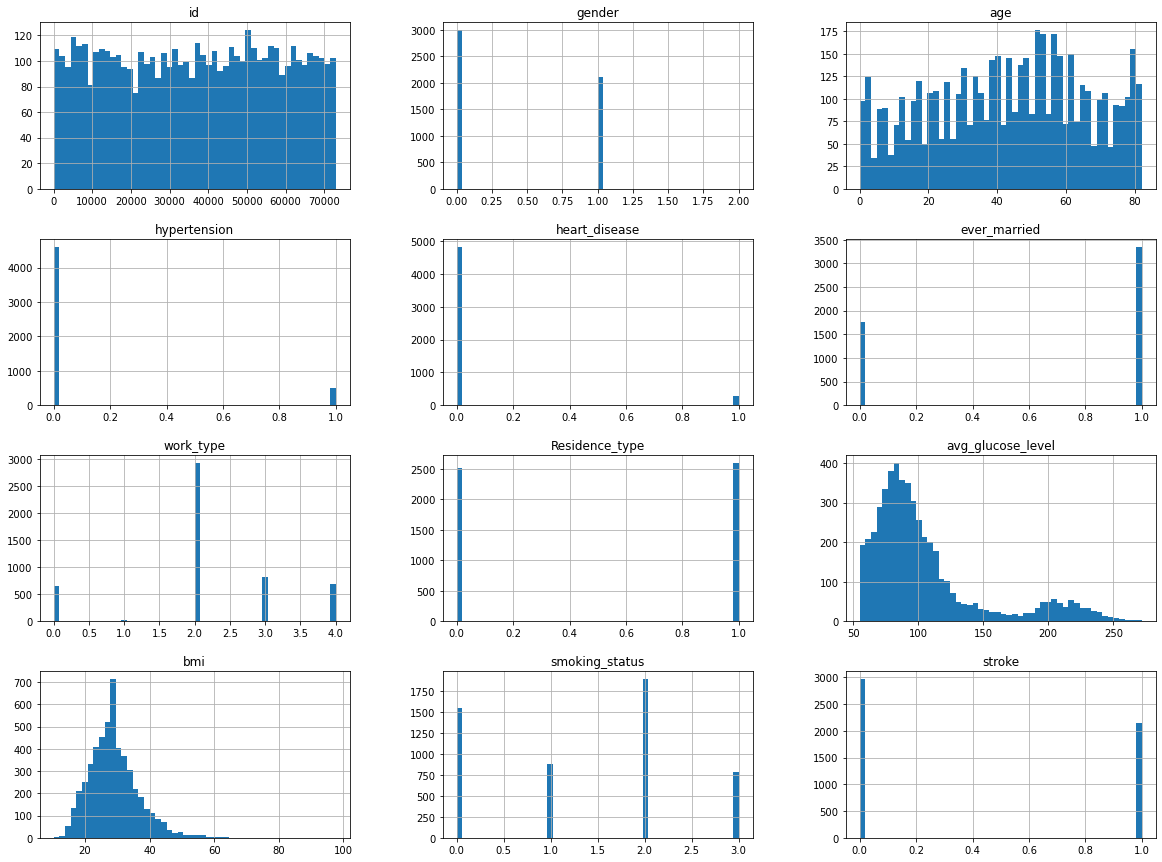

In [27]:
dataset.hist(bins=50,figsize=(20,15))

## Coorelation

Correlation is a statistical term describing the degree to which two variables move in coordination with one another. 
 If the two variables move in the same direction, then those variables are said to have a positive correlation.
 If they move in opposite directions, then they have a negative correlation.

In [28]:
stro = dataset.corr()
stro['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.062899
avg_glucose_level    0.046423
bmi                  0.037697
smoking_status       0.029152
hypertension         0.026419
ever_married         0.025221
heart_disease        0.019359
id                   0.006586
gender              -0.008421
work_type           -0.013847
Residence_type      -0.014058
Name: stroke, dtype: float64

After applying coorealtion in our dataset, we got above result in which age and avg_glucose_level having highly positive
coorelation to the label where as gender,work_type and Residence_type have highly negative coorelation.

## HeatMap

A heatmap (or heat map) is a graphical representation of data where values are depicted by color. 
They are essential in detecting what does or doesn't work on a website or product page. 

In [8]:
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

<AxesSubplot:>

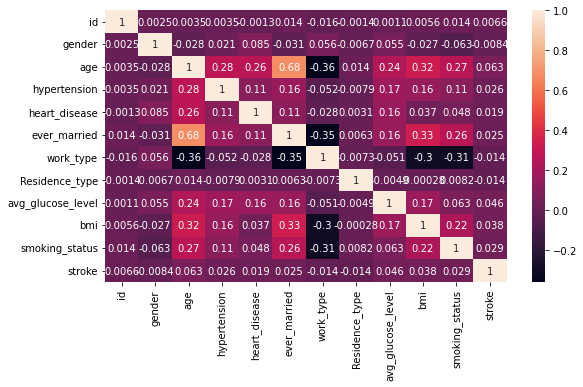

In [29]:
pt.figure(figsize=(9,5))
sns.heatmap(dataset.corr(),annot=True)

As the coorelation result, i explained above age and avg_glucose_level having highly
positive coorelation to the label where as gender,work_type and Residence_type have highly negative coorelation.
This can be seen in the above heat map where the deeper shades represent to the positive coorelation and lighter shades represent to the
negative coorelation.


## Encoding categorical features

In [10]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


 Here, the above value displays the column name of features.

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB
None


In [12]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## Dealing with the missing values in 'bmi' column

In [13]:
median=dataset["bmi"].median()
dataset["bmi"].fillna(median)
dataset.shape
# This is for taking out the shape of our dataset

(5110, 12)

Simple Imputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. 
It replaces the NaN values with a specified placeholder.


In [14]:
# We fill the missing values in the Body Mass Index variable(bmi).
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(dataset)
imputer.statistics_
x= imputer.transform(dataset)
dataset=pd.DataFrame(x,columns=dataset.columns)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   float64
 4   heart_disease      5110 non-null   float64
 5   ever_married       5110 non-null   float64
 6   work_type          5110 non-null   float64
 7   Residence_type     5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   float64
dtypes: float64(12)
memory usage: 479.2 KB


Now, with filling bmi values,our dataset has fulfilled and ready to obtain result.

## Splitting the dataset into the training set and test set

In [15]:
# Declaration of variables X and y.
ind_col=[col for col in dataset.columns if col!='stroke']
dep_col='stroke'
X=dataset[ind_col]
y=dataset[dep_col]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

25% of the dataset is test set where as remaining 75% is for training set. 
Both are uniform dataset which does not change the results. 

## Feature Scaling

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building of Model

## Training the Random forest Classification model on the Training Set

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [18]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5,criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)*100

94.93736951983298

 After using random forest classfication, i got 94 % of accuracy with our trained data. 
It is good but we want to know what other algorithm reacts with this dataset.
Now, lets find it below:

## Making Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[461 254]
 [358 205]]


0.5211267605633803

461 is True Negative(TN) in which predicted values correctly predicted as an actual negative.
254 is False Positive(FP) in which predicted values incorrectly predicted an actual positive.
i.e., Negative values predicted as positive.
358 is False Negative(FN) in which positive values predicted as negative.
205 is True Positive(TP) in which predicted values correctly predicted as actual positive. 


## Applying K-Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 51.56 %
Standard Deviation: 2.02 %


Here, the mean accuracy rate is 51.56 percent and Standard deviation is 2.02 percent.

## Training the Logistic Regression on the Training Set

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
dtc = LogisticRegression()
dtc.fit(X_train, y_train)
dtc.score(X_train,y_train)*100

58.53340292275574

 After using logistic Regression, i got 58.53 % of accuracy with our trained data. It is average but we want to know what other algorithm reacts with this dataset. Now, lets find it below:

## Making Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[706   9]
 [549  14]]


0.5633802816901409

706 is True Negative(TN) in which predicted values correctly predicted as an actual negative.
9 is False Positive(FP) in which predicted values incorrectly predicted an actual positive.
i.e., Negative values predicted as positive.
549 is False Negative(FN) in which positive values predicted as negative.
14 is True Positive(TP) in which predicted values correctly predicted as actual positive. 


## Applying K-Fold Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 58.43 %
Standard Deviation: 0.86 %


Here, the mean accuracy rate is 58.43 percent and Standard deviation is 0.86 percent.

## Training the K-Nearest Neighbour (KNN) Classification model on the Training Set 

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [24]:
# K-Nearest Neighbour Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
knn.score(X_train,y_train)*100


75.88726513569938

After using K-Nearest Neighbour, i got 75.88 % of accuracy with our trained data. It is average, higher from Logistic Regression but lower than Random Forest Classifications.

## Making Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[601 114]
 [454 109]]


0.5555555555555556

601 is True Negative(TN) in which predicted values correctly predicted as an actual negative.
114 is False Positive(FP) in which predicted values incorrectly predicted an actual positive.
i.e., Negative values predicted as positive.
454 is False Negative(FN) in which positive values predicted as negative.
109is True Positive(TP) in which predicted values correctly predicted as actual positive. 


## Applying K-Fold Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.63 %
Standard Deviation: 2.83 %


Here, the mean accuracy rate is 56.63 percent and Standard deviation is 2.83 percent.

## Conclusion: 

Therefore, Random Forest Classifications has got 94.93 Percent accuracy rate which is higher among other algorithm. It can perform both regression and classification tasks. It produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm provides a higher level of accuracy in predicting outcomes over other algorithm.

## Instruction:

1. Open anaconda navigator.
2. Launch jupyter notebook.
3. Search for the file which you want to load.
4. Select the file and a new tab will open where the code in the selected file will be loaded.
5. Now, if you want to edit or add code in it then rerun and restart all the cell after doing so.
6. Otherwise, simply, run all the cell. 

